In [1]:
import os
import sys
import networkx as nx
import pathlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=10,10


sys.path.append('/home/chris/src/provenance_py')

if __name__ == "__main__" and __package__ is None:
    __package__ = "provenance_lib"

from .parse import ProvDAG, ProvNode, Config


In [2]:
cwd = os.getcwd()
parent = pathlib.Path(cwd).parent
DATA_DIR = os.path.join(parent, 'tests/data')
qzv = os.path.join(DATA_DIR, 'v5_uu_emperor.qzv')
cfg = Config()
dag = ProvDAG(archive_fp=qzv)
contents = dag.parser_results.archive_contents
nodes = list(contents.values())


In [3]:
print(nodes)

[ProvNode(ffb7cee3-2f1f-4988-90cc-efd5184ef003, Visualization, fmt=None), ProvNode(aea3994b-0888-41c1-8e8c-69f6615d07cf, FeatureTable[Frequency], fmt=BIOMV210DirFmt), ProvNode(0af08fa8-48b7-4c6a-83c6-e0f766156343, FeatureTable[Frequency], fmt=BIOMV210DirFmt), ProvNode(bce3d09b-e296-4f2b-9af4-834db6412429, Phylogeny[Rooted], fmt=NewickDirectoryFormat), ProvNode(7ecf8954-e49a-4605-992e-99fcee397935, FeatureData[Sequence], fmt=DNASequencesDirectoryFormat), ProvNode(430a6575-86b3-4cf6-b72e-0f7fce3ed342, FeatureData[AlignedSequence], fmt=AlignedDNASequencesDirectoryFormat), ProvNode(9cc3281a-fefb-408e-8cf0-10637a06d84a, PCoAResults, fmt=OrdinationDirectoryFormat), ProvNode(025e723d-b367-4812-820a-ae8bf8b80af4, DistanceMatrix % Properties(['phylogenetic']), fmt=DistanceMatrixDirectoryFormat), ProvNode(83a80bfd-8954-4571-8fc7-ac9e8435156e, Visualization, fmt=None), ProvNode(89af91c0-033d-4e30-8ac4-f29a3b407dc1, FeatureTable[Frequency], fmt=BIOMV210DirFmt), ProvNode(99fa3670-aa1a-45f6-ba8e-803

In [4]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.nodes

NodeView((ProvNode(ffb7cee3-2f1f-4988-90cc-efd5184ef003, Visualization, fmt=None), ProvNode(aea3994b-0888-41c1-8e8c-69f6615d07cf, FeatureTable[Frequency], fmt=BIOMV210DirFmt), ProvNode(0af08fa8-48b7-4c6a-83c6-e0f766156343, FeatureTable[Frequency], fmt=BIOMV210DirFmt), ProvNode(bce3d09b-e296-4f2b-9af4-834db6412429, Phylogeny[Rooted], fmt=NewickDirectoryFormat), ProvNode(7ecf8954-e49a-4605-992e-99fcee397935, FeatureData[Sequence], fmt=DNASequencesDirectoryFormat), ProvNode(430a6575-86b3-4cf6-b72e-0f7fce3ed342, FeatureData[AlignedSequence], fmt=AlignedDNASequencesDirectoryFormat), ProvNode(9cc3281a-fefb-408e-8cf0-10637a06d84a, PCoAResults, fmt=OrdinationDirectoryFormat), ProvNode(025e723d-b367-4812-820a-ae8bf8b80af4, DistanceMatrix % Properties(['phylogenetic']), fmt=DistanceMatrixDirectoryFormat), ProvNode(83a80bfd-8954-4571-8fc7-ac9e8435156e, Visualization, fmt=None), ProvNode(89af91c0-033d-4e30-8ac4-f29a3b407dc1, FeatureTable[Frequency], fmt=BIOMV210DirFmt), ProvNode(99fa3670-aa1a-45f6

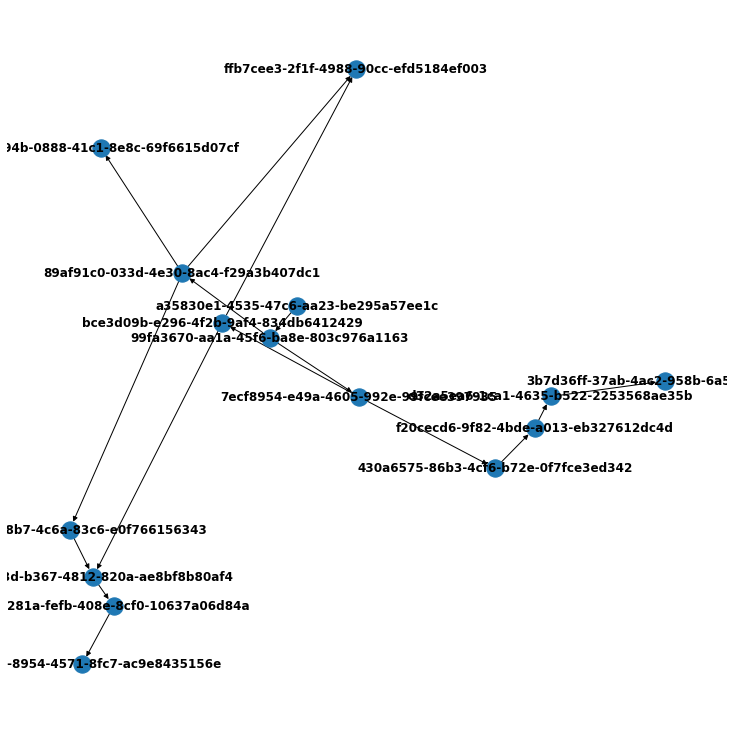

In [5]:
nx.draw(dag.dag, with_labels=True, font_weight="bold")

In [6]:
# TODO: Why does this query produce multiple results?
print(dag.dag.edges(('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003')))

[('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'), ('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'aea3994b-0888-41c1-8e8c-69f6615d07cf'), ('89af91c0-033d-4e30-8ac4-f29a3b407dc1', '0af08fa8-48b7-4c6a-83c6-e0f766156343')]


In [7]:
# it's an out-edge view?
dag.dag.edges(('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'))

OutEdgeDataView([('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'), ('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'aea3994b-0888-41c1-8e8c-69f6615d07cf'), ('89af91c0-033d-4e30-8ac4-f29a3b407dc1', '0af08fa8-48b7-4c6a-83c6-e0f766156343')])

In [8]:
# THIS is how we get the edge data. Index the in-edge first, and then the out-edge
dag.dag['89af91c0-033d-4e30-8ac4-f29a3b407dc1']['ffb7cee3-2f1f-4988-90cc-efd5184ef003']['type']

'table'

In [9]:
dag.dag.in_edges('ffb7cee3-2f1f-4988-90cc-efd5184ef003')

InEdgeDataView([('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'), ('bce3d09b-e296-4f2b-9af4-834db6412429', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003')])

In [10]:
# Order matters for has_edge too
print(dag.has_edge('89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'))
print(dag.has_edge('ffb7cee3-2f1f-4988-90cc-efd5184ef003', '89af91c0-033d-4e30-8ac4-f29a3b407dc1'))

True
False
